
• Full Names of all Group members:
Yutong Dong, Haichao Sun, Lydia Zheng

• Student Numbers of all Group member: 
68999432, 25089153, 22738009

• Group number (from Canvas): 15


## **Part 0: Loading the libraries and the data [0 Marks]**


# **Final Project**, BAIT509 Winter 2023
**Business Applications of Machine Learning [100 Marks]**

**Deadline: Thursday, February 9th @ 11:59pm**

In this project, we want to develop a statistical model for the mortality rate of lung cancer in the United States.

In [1]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical learning
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Loading data
Load the three csv files as pandas dataframes directly from their URLs.

In [2]:
fulldf = pd.read_csv('https://saref.github.io/teaching/BAIT509/mydata.csv').drop(columns='Unnamed: 0')
data_dict = pd.read_csv('https://saref.github.io/teaching/BAIT509/descriptions.csv')
populationdf = pd.read_csv('https://saref.github.io/teaching/BAIT509/populations.csv').drop(columns='Unnamed: 0')

## **Part 1: Getting started [40 Marks]**

## Data cleaning


### 1.1 Convert `FIPS` column to correct format [5 Marks]

In [3]:
fulldf["FIPS"].dtypes

dtype('int64')

In [4]:
fulldf["FIPS"]=fulldf["FIPS"].astype(str)
fulldf["FIPS"]

0        2013
1        2016
2        2020
3        2050
4        2060
        ...  
3129    56037
3130    56039
3131    56041
3132    56043
3133    56045
Name: FIPS, Length: 3134, dtype: object

In [5]:
fulldf["FIPS"]=fulldf["FIPS"].str.pad(width=5, side='left', fillchar='0')
fulldf["FIPS"]

0       02013
1       02016
2       02020
3       02050
4       02060
        ...  
3129    56037
3130    56039
3131    56041
3132    56043
3133    56045
Name: FIPS, Length: 3134, dtype: object

In [6]:
fulldf["FIPS"].dtypes

dtype('O')

### 1.2 Check for null values [5 Marks]

We have removed "Med_Income_Black", "Med_Income_Nat_Am", "Med_Income_Asian" and "Med_Income_Hispanic", because their percentages of null values are greater than 20.

In [7]:
fulldf.isna().sum()

State                     0
AreaName                  0
All_Poverty               0
M_Poverty                 0
F_Poverty                 0
FIPS                      0
Med_Income                1
Med_Income_White          2
Med_Income_Black       1210
Med_Income_Nat_Am      1660
Med_Income_Asian       1757
Med_Income_Hispanic     681
M_With                    0
M_Without                 0
F_With                    0
F_Without                 0
All_With                  0
All_Without               0
Incidence_Rate            0
Avg_Ann_Incidence         0
Recent_Trend              0
Mortality_Rate            0
Avg_Ann_Deaths            0
dtype: int64

In [8]:
fulldf=fulldf.drop(fulldf.columns[fulldf.isnull().mean()>0.2],axis=1)

### 1.3 Check the format of columns [5 Marks] 

By an inspection of the data types of all columns, we identified columns Incidence_Rate, Avg_Ann_Incidence, Mortality_Rate, Avg_Ann_Deaths as they have unexpected types. We were expecting these columns to be numeric, for instance, a ‘float’ type, whereas they present to be ‘object’. The reason is that these columns have inconsistent data types and contain non-numeric values along with numeric ones. Take Mortality_Rate, and Avg_Ann_Deaths as an example, they have symbol ‘ * ’ that denotes the values which are smaller than certain threshold*

In [9]:
fulldf.dtypes

State                 object
AreaName              object
All_Poverty            int64
M_Poverty              int64
F_Poverty              int64
FIPS                  object
Med_Income           float64
Med_Income_White     float64
M_With                 int64
M_Without              int64
F_With                 int64
F_Without              int64
All_With               int64
All_Without            int64
Incidence_Rate        object
Avg_Ann_Incidence     object
Recent_Trend          object
Mortality_Rate        object
Avg_Ann_Deaths        object
dtype: object

In [10]:
data_dict

,Unnamed: 0,Feature,Definition,Notes
0,0,State,NaN,NaN
1,1,AreaName,NaN,NaN
2,2,All_Poverty,Both male and female reported below poverty li...,NaN
3,3,M_Poverty,Males below poverty (Raw),NaN
4,4,F_Poverty,Females below poverty (Raw),NaN
5,5,FIPS,State + County FIPS (Raw),NaN
6,6,Med_Income,Med_Income all enthnicities (Raw),NaN
7,7,Med_Income_White,Med_Income white (Raw),NaN
8,8,Med_Income_Black,Med_Income black (Raw),NaN
9,9,Med_Income_Nat_Am,Med_Income native American (Raw),NaN


### 1.4 Merge the population data to the main dataframe [5 Marks]

We decided to join the 2 data frames using FIPs. The first step was to create a FIPs column in populationdf. We extracted the first 2 letters from column "STATE" and the first 3 letters from "COUNTY" and created the FIPs column which basically concatenated these 5 letters. In the next step, we joined the fulldf to populationdf on the mutual values in FIPs

In [11]:
populationdf.head()

,POPESTIMATE2015,STATE,COUNTY
0,4858979,1,0
1,55347,1,1
2,203709,1,3
3,26489,1,5
4,22583,1,7


In [12]:
populationdf.dtypes

POPESTIMATE2015    int64
STATE              int64
COUNTY             int64
dtype: object

In [13]:
populationdf["STATE"]=populationdf["STATE"].astype(str)
populationdf["COUNTY"]=populationdf["COUNTY"].astype(str)
populationdf.dtypes

POPESTIMATE2015     int64
STATE              object
COUNTY             object
dtype: object

In [14]:
populationdf["STATE"]=populationdf["STATE"].str.pad(width=2, side='left', fillchar='0')
populationdf["COUNTY"]=populationdf["COUNTY"].str.pad(width=3, side='left', fillchar='0')

In [15]:
populationdf["FIPS"]=populationdf["STATE"]+populationdf["COUNTY"]

In [16]:
fulldf_new=pd.merge(fulldf,populationdf,how="inner",on='FIPS')

### 1.5 Cleaning the output (response) column `Mortality_Rate` [10 Marks]

*Hint*: To get the full mark for this part, conduct multiple relevant exploratory data analyses. Then use them to support your decision on removing or modifying the non-numerical values. Your choice results in full mark if the supporting analysis and arguments are deemed adequate and convincing.


In the 'Mortality_Rate', the ‘* ’ means in that particular state and area , fewer than 16 cases were reported. We filtered out 325 rows/ records that contain “ * ” in the 'Mortality_Rate' column. We performed the following exploratory analysis on the dataset and decided to drop the rows where 'Mortality_Rate' showed as ‘*’ based on the analysis. 

1. When we replaced ‘ * ’ with a certain value, the entire dataset exhibited a normal distribution with a vertical line on the left side, where the normal distribution has lost its validity due to the manually added values. Given the size of the dataset, however, we believe it’s more reasonable for the Mortality_Rate to show a pattern close to a normal distribution. The vertical line could have appeared as a result of biases brough into the dataset by the value we selected to replace the “ * ” data .

2. We then considered assigning random values ranging from 0 to 16 to replace the ' * ' values in Mortality_Rate. The goal was to reconstruct the dataset so the Mortality_Rate could follow a normal distribution. Since we only had overall a little more than 3000 rows, fitting 325 points that contained values in the lower range into the dataset would always create a undesirable peak at the left end of the distribution .


3. We also tried to assign random numbers 1-16 to ' * ' so that these 325 values could form a normal distribution on its own. Similar to reason number 1 that we should expect the mortality to follow a normal distribution, having 2 normal distributions across ‘Mortality_Rate’ data would not be reasonable in this case. 

4. The ' * ' represent the cases where less than 16 deaths were reported. Considering the large population size in those areas, we believed the 16 cases were not statistically significant to our goal when measured against the entire population. 


In [17]:
# delete all rows with column Mortality_Rate is '*'
indexMR = fulldf_new[(fulldf_new['Mortality_Rate'] == '*')].index
fulldf_new.drop(indexMR , inplace=True)
fulldf_new.head(15)


,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,M_With,M_Without,...,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,STATE,COUNTY
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,02020,78326.0,87235.0,120747,23245,...,243173,44638,61.5,131,stable,47.3,96,298695,02,020
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,02050,51012.0,92647.0,6396,2708,...,13023,4482,62.7,6,stable,58.3,5,17946,02,050
7,AK,"Fairbanks North Star Borough, Alaska",7752,3523,4229,02090,71068.0,74242.0,40605,6957,...,80815,12279,58.1,36,stable,54,31,99631,02,090
9,AK,"Juneau City and Borough, Alaska",2110,1145,965,02110,85746.0,90553.0,13739,2433,...,27321,4646,35.1,9,stable,34.4,8,32756,02,110
10,AK,"Kenai Peninsula Borough, Alaska",5558,2596,2962,02122,63684.0,64663.0,22391,6435,...,44059,11868,64.9,39,stable,50.1,28,58059,02,122
11,AK,"Ketchikan Gateway Borough, Alaska",1640,792,848,02130,64222.0,73313.0,5339,1428,...,10866,2510,88.3,12,stable,70.8,9,13709,02,130
12,AK,"Kodiak Island Borough, Alaska",1552,962,590,02150,70887.0,82857.0,4941,1920,...,9884,3399,74.7,7,stable,76.2,6,13889,02,150
14,AK,"Matanuska-Susitna Borough, Alaska",9454,4346,5108,02170,72983.0,74141.0,39282,9314,...,77033,17398,69.7,51,stable,53.9,37,101095,02,170
15,AK,"Nome Census Area, Alaska",2592,1399,1193,02180,48868.0,85455.0,3506,1605,...,6936,2719,103.6,6,stable,96.1,6,9846,02,180
16,AK,"North Slope Borough, Alaska",976,532,444,02185,72576.0,86250.0,4847,1248,...,7426,2158,153.4,6,stable,124.9,5,9687,02,185


### 1.6 Reformat the rest of the columns specified in 1.3 to numerical [5 Marks]


** In this step, we reformatted the 3 columns Incidence_Rate, Avg_Ann_Incidence and Avg_Ann_Deaths, which we identified from step 1.3. 

 The ‘ * ’ values in the 'Incidence_Rate' were replaced by 8 as 8 cases/ 100,000 people was considered as the average number of lung cancer Incidence_Rate in those areas where less than 16 cases of lung cancer per 100,000 people were reported. Using the mean value across the dataset would eliminate the possibility of introducing biases into the data. 
 
 We also cleaned the rows that contained ' # ' by replacing ' # ' with an empty string. In the next step of cleaning, we converted the dash lines which represented the missing values in the 'Incidence_Rate' to ‘NaN’. Since ‘NaN’ is a special floating-point value, this conversion prepared us for the next step where we converted the entire 'Incidence_Rate' column into numeric. 
 
In the last step, we replaced the  ‘NaN’ values with the mean value of the reformatted column 'Incidence_Rate'  in order to minimize biases and reduce noises  We followed the same steps and logics as we proceeded to cleaning’ Avg_Ann_Incidence ‘and ‘Avg_Ann_Deaths’. Eventually, all ' * ' and missing values were replaced by countable and addable numeric values **

In [18]:
fulldf_new[1620:1625]

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,M_With,M_Without,...,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,STATE,COUNTY
1755,ND,"Burleigh County, North Dakota",6946,3052,3894,38015,65254.0,66945.0,39076,3389,...,80204,6139,52.2,49,stable,34.4,32,92991,38,015
1756,ND,"Cass County, North Dakota",19082,8990,10092,38017,53289.0,55676.0,73605,7721,...,147749,13589,59.8,80,rising,37.3,50,171512,38,017
1765,ND,"Grand Forks County, North Dakota",11223,5076,6147,38035,48676.0,50367.0,31352,2691,...,62182,4888,59.7,36,stable,42.6,26,70916,38,035
1767,ND,"Griggs County, North Dakota",179,78,101,38039,48355.0,50956.0,1047,98,...,2049,189,*,3 or fewer,*,76.8,4,2314,38,039
1772,ND,"McHenry County, North Dakota",738,333,405,38049,57386.0,57799.0,2706,302,...,5251,487,63.6,6,stable,41.7,4,5968,38,049


In [19]:
# Incidence Rate
fulldf_new['Incidence_Rate'][fulldf['Incidence_Rate'] == '*'] = '8'
fulldf_new['Incidence_Rate'] = fulldf_new['Incidence_Rate'].str.replace('#', '')
fulldf_new['Incidence_Rate'][fulldf_new['Incidence_Rate'] == '_']= np.nan
fulldf_new['Incidence_Rate'][fulldf_new['Incidence_Rate'] == '__']= np.nan

# Avg_Ann_Incidence
fulldf_new['Avg_Ann_Incidence'][fulldf['Avg_Ann_Incidence'] == '3 or fewer'] = '1.5'
fulldf_new['Avg_Ann_Incidence'][fulldf_new['Avg_Ann_Incidence'] == '_']= np.nan
fulldf_new['Avg_Ann_Incidence'][fulldf_new['Avg_Ann_Incidence'] == '__']= np.nan

# Avg_Ann_Death
fulldf_new['Avg_Ann_Deaths'] = fulldf_new['Avg_Ann_Deaths'].str.replace(',', '')
fulldf_new['Avg_Ann_Deaths'][fulldf['Avg_Ann_Deaths'] == '*'] = '8'

C:\Users\sunhc\AppData\Local\Temp\ipykernel_9936\3398647162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulldf_new['Incidence_Rate'][fulldf['Incidence_Rate'] == '*'] = '8'
C:\Users\sunhc\AppData\Local\Temp\ipykernel_9936\3398647162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulldf_new['Incidence_Rate'][fulldf_new['Incidence_Rate'] == '_']= np.nan
C:\Users\sunhc\AppData\Local\Temp\ipykernel_9936\3398647162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [20]:
# Incidence Rate
fulldf_new['Incidence_Rate'] = pd.to_numeric(fulldf_new['Incidence_Rate'])
mean_incrate = fulldf_new['Incidence_Rate'].mean()
fulldf_new['Incidence_Rate'] = fulldf_new['Incidence_Rate'].replace(np.nan, mean_incrate)
# Avg_Ann_Incidence
fulldf_new['Avg_Ann_Incidence'] = pd.to_numeric(fulldf_new['Avg_Ann_Incidence'])
mean_inc = fulldf_new['Avg_Ann_Incidence'].mean()
fulldf_new['Avg_Ann_Incidence'] = fulldf_new['Avg_Ann_Incidence'].replace(np.nan, mean_inc)
# Avg_Ann_Death
fulldf_new['Avg_Ann_Deaths'] = pd.to_numeric(fulldf_new['Avg_Ann_Deaths'])
# Mortality Rate
fulldf_new['Mortality_Rate'] = pd.to_numeric(fulldf_new['Mortality_Rate'])

### 1.7 Make the numerical data useful [5 Marks]
We know we have many columns of data, some of them are dependent on the populations. 

We calculated rate for all raw data except Med_Income and Med_White_Income, since we believe those two were not related to population.


In [21]:
fulldf_new['All_Poverty_Rate']=fulldf_new['All_Poverty']*100000/fulldf_new['POPESTIMATE2015']
fulldf_new['M_Poverty_Rate']=fulldf_new['M_Poverty']*100000/fulldf_new['POPESTIMATE2015']
fulldf_new['F_Poverty_Rate']=fulldf_new['F_Poverty']*100000/fulldf_new['POPESTIMATE2015']

fulldf_new['M_With_Rate']=fulldf_new['M_With']*100000/fulldf_new['POPESTIMATE2015']
fulldf_new['M_Without_Rate']=fulldf_new['M_Without']*100000/fulldf_new['POPESTIMATE2015']
fulldf_new['F_With_Rate']=fulldf_new['F_With']*100000/fulldf_new['POPESTIMATE2015']
fulldf_new['F_Without_Rate']=fulldf_new['F_Without']*100000/fulldf_new['POPESTIMATE2015']
fulldf_new['All_With_Rate']=fulldf_new['All_With']*100000/fulldf_new['POPESTIMATE2015']
fulldf_new['All_Without_Rate']=fulldf_new['All_Without']*100000/fulldf_new['POPESTIMATE2015']
fulldf_new['Avg_Ann_Incidence_Rate']=fulldf_new['Avg_Ann_Incidence']*100000/fulldf_new['POPESTIMATE2015']
fulldf_new['Avg_Ann_Deaths_Rate']=fulldf_new['Avg_Ann_Deaths']*100000/fulldf_new['POPESTIMATE2015']

In [22]:
fulldf_new.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,M_With,M_Without,...,M_Poverty_Rate,F_Poverty_Rate,M_With_Rate,M_Without_Rate,F_With_Rate,F_Without_Rate,All_With_Rate,All_Without_Rate,Avg_Ann_Incidence_Rate,Avg_Ann_Deaths_Rate
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,02020,78326.0,87235.0,120747,23245,...,3581.579872,4424.580257,40424.848089,7782.185842,40986.959942,7162.155376,81411.808032,14944.341218,43.857447,32.139808
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,02050,51012.0,92647.0,6396,2708,...,12253.426948,12063.969687,35640.254096,15089.713585,36927.449014,9885.211189,72567.703109,24974.924774,33.433634,27.861362
7,AK,"Fairbanks North Star Borough, Alaska",7752,3523,4229,02090,71068.0,74242.0,40605,6957,...,3536.048017,4244.662806,40755.387379,6982.766408,40358.924431,5341.710913,81114.311811,12324.477321,36.133332,31.114814
9,AK,"Juneau City and Borough, Alaska",2110,1145,965,02110,85746.0,90553.0,13739,2433,...,3495.542801,2946.025156,41943.460740,7427.646843,41464.159238,6756.014165,83407.619978,14183.661009,27.475882,24.423006
10,AK,"Kenai Peninsula Borough, Alaska",5558,2596,2962,02122,63684.0,64663.0,22391,6435,...,4471.313664,5101.706884,38565.941542,11083.552938,37320.656573,9357.722317,75886.598116,20441.275254,67.173048,48.226804


In [23]:
fulldf_new.dtypes

State                      object
AreaName                   object
All_Poverty                 int64
M_Poverty                   int64
F_Poverty                   int64
FIPS                       object
Med_Income                float64
Med_Income_White          float64
M_With                      int64
M_Without                   int64
F_With                      int64
F_Without                   int64
All_With                    int64
All_Without                 int64
Incidence_Rate            float64
Avg_Ann_Incidence         float64
Recent_Trend               object
Mortality_Rate            float64
Avg_Ann_Deaths              int64
POPESTIMATE2015             int64
STATE                      object
COUNTY                     object
All_Poverty_Rate          float64
M_Poverty_Rate            float64
F_Poverty_Rate            float64
M_With_Rate               float64
M_Without_Rate            float64
F_With_Rate               float64
F_Without_Rate            float64
All_With_Rate 

## **Part 2: Exploratory analysis [15 Marks]**

### 2.1 Visualizing different features [5 Marks]


These plots indicate correlations between features. Between those where a strong correlation exists, the plot shows a relatively clear linear relationship. For example, the plots that feature All_Poverty_Rate VS M_Poverty_Rate and All_Poverty_Rate VS F_Poverty_Rate have both a linear shape.

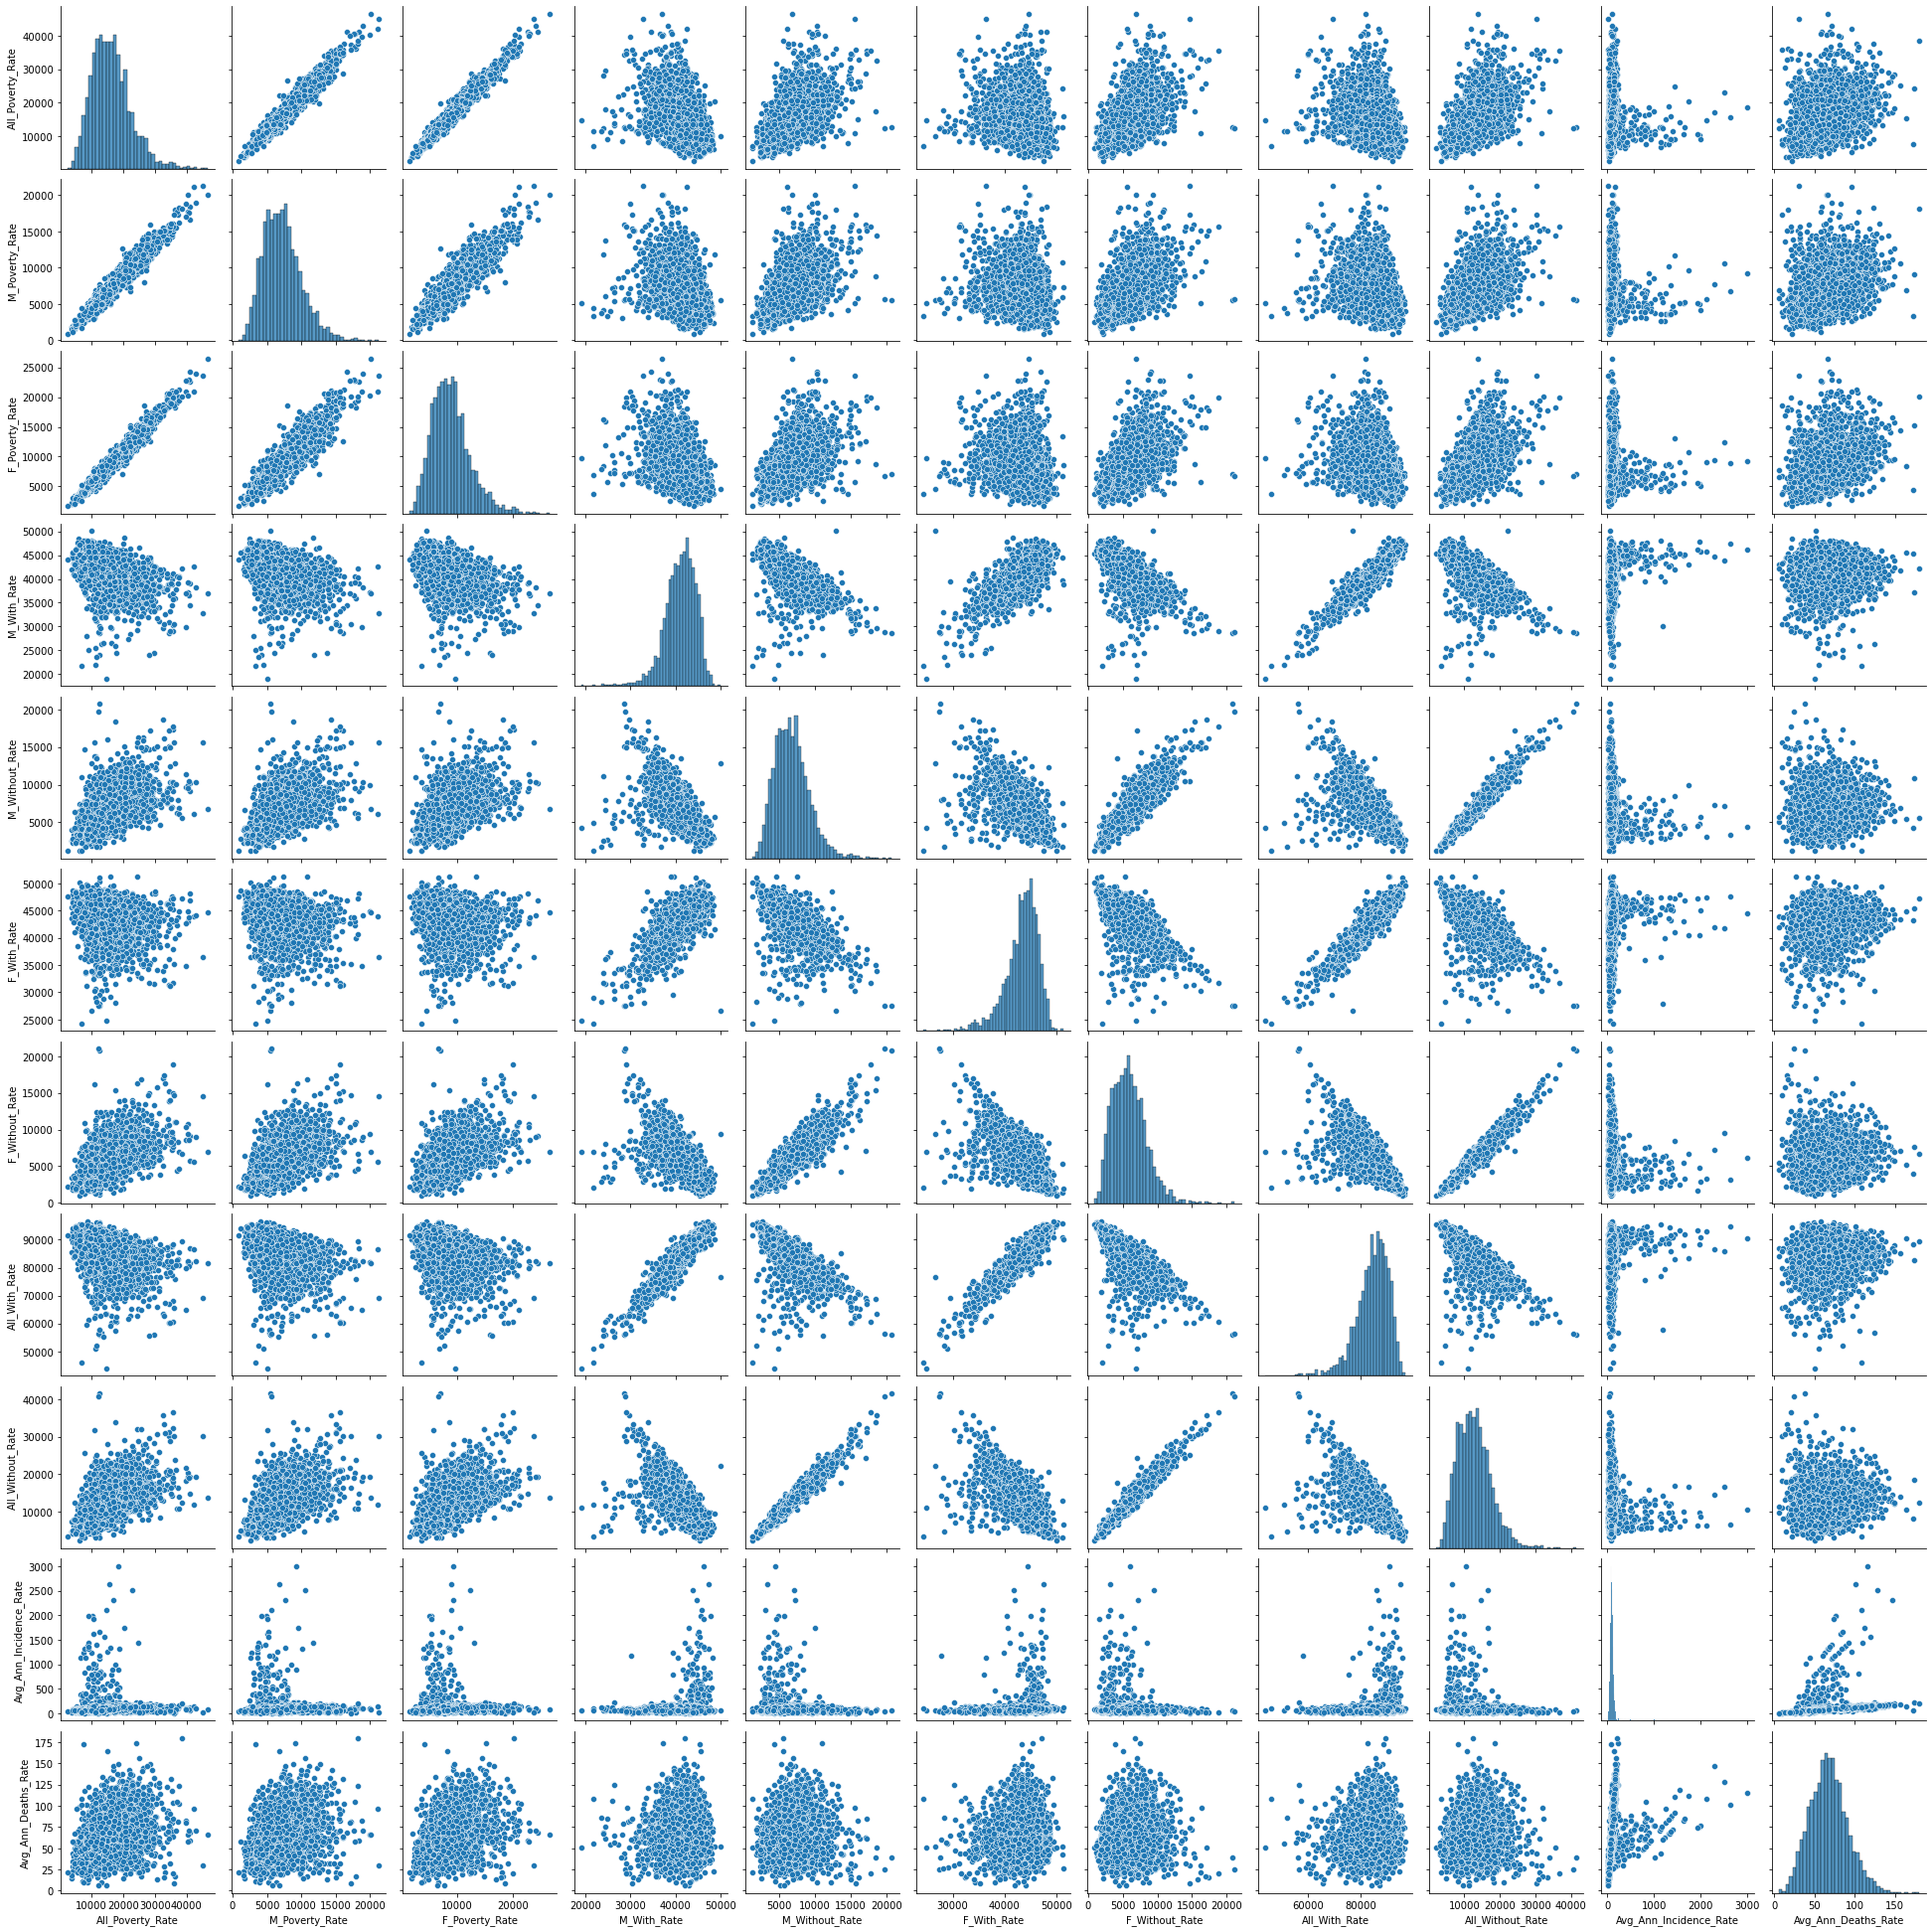

In [25]:
sns.pairplot(fulldf_new, vars=fulldf_new.columns[22:34])
plt.show()

### 2.2 Selecting the most important features [10 Marks]


In [26]:
corr_mortality = fulldf_new.corrwith(fulldf_new['Mortality_Rate'])
corr_mortality
df_corr_mortality = pd.DataFrame(corr_mortality)
df_corr_mortality
df_corr_mortality.sort_values(by= 0,key=abs)

,0
F_With_Rate,-0.045600
Avg_Ann_Incidence_Rate,0.077333
All_With_Rate,-0.095314
Avg_Ann_Deaths,-0.126687
M_With_Rate,-0.130483
Avg_Ann_Incidence,-0.143752
F_Poverty,-0.144958
All_Poverty,-0.145649
M_Poverty,-0.146402
F_Without,-0.150540


In [27]:
# shuffle the dataframe
fulldf_new = fulldf_new.sample(frac=1).reset_index(drop=True)

Here we selected features based on the correlation coefficients calculated above. The coefficients reflected the strength of the correlations between the feature and the dependent variable,‘Mortality_Rate'. The guiding principle we followed was to pick features that have relatively larger absolute coefficient values. We included only the calculated rate, POPESTIMATE2015,Med_Income,and Med_Income_White . 

In [28]:
# select features
final_data=fulldf_new[['Mortality_Rate','POPESTIMATE2015', 'Incidence_Rate', 'All_Poverty_Rate', 'F_Poverty_Rate','M_Poverty_Rate','Avg_Ann_Incidence_Rate',
                   'Avg_Ann_Deaths_Rate','All_With_Rate','All_Without_Rate','F_Without_Rate','M_Without_Rate','F_With_Rate',
                   'M_With_Rate','Med_Income','Med_Income_White']]
list(final_data.columns)

['Mortality_Rate',
 'POPESTIMATE2015',
 'Incidence_Rate',
 'All_Poverty_Rate',
 'F_Poverty_Rate',
 'M_Poverty_Rate',
 'Avg_Ann_Incidence_Rate',
 'Avg_Ann_Deaths_Rate',
 'All_With_Rate',
 'All_Without_Rate',
 'F_Without_Rate',
 'M_Without_Rate',
 'F_With_Rate',
 'M_With_Rate',
 'Med_Income',
 'Med_Income_White']

## **Part 3: Regression Model Construction [30 Marks]**

### 3.1 Splitting the dataset [5 Marks] 


In [29]:
# let the shuffled data equal to selected 
fulldf_shuffled = final_data

We shuffled the entire dataset in order to remove the algebraic order and then separated out 20% of it as out test set 

In [30]:
fulldf_test=fulldf_shuffled[int(0.8*len(fulldf_shuffled)):len(fulldf_shuffled)]
fulldf_shuffled=fulldf_shuffled[0:int(0.8*len(fulldf_shuffled))]

### 3.2 Model training [15 Marks]


### First Model - forward selection

Using forward selection, we start with "Incidence_Rate", getting R2 = 66.67
1. adding "Avg_Ann_Deaths_Rate", R2 = 78.24
2. adding "Med_Income", R2 = 81.57
3. adding "POPESTIMATE2015", R2 = 78.87
<br>

In this case, we should keep the first 3 variables: Incidence_Rate, Avg_Ann_Deaths_Rate, Med_Income
<br>
Note that each running of this doc will shuffle the dataset once, so the r2 may be different each time, however, the pattern stays the same.

In [31]:
fulldf_shuffled_slice_1 = fulldf_shuffled.loc[:,["Mortality_Rate","Incidence_Rate","Avg_Ann_Deaths_Rate","Med_Income"]]
data_processed_1 = fulldf_shuffled_slice_1.values

In [32]:
from sklearn.model_selection import train_test_split # Import train_test_split function

#train_x,val_x,train_y,val_y = train_test_split(data_processed[:,1:],
                                                              # data_processed[:,0],
                                                              # test_size=0.2)
train_x_1 = data_processed_1[:1797:,1:]
train_y_1 = data_processed_1[:1797:,0]
val_x_1 = data_processed_1[1797:,1:]
val_y_1 = data_processed_1[1797:,0]

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression()
model_name = ['Linear regression 1']
lr.fit(train_x_1, train_y_1)
predicted_train_1 = lr.predict(train_x_1)
predicted_val_1 = lr.predict(val_x_1)
validation_scores_1 = lr.score(val_x_1, val_y_1)
training_scores_1 = lr.score(train_x_1, train_y_1)
train_mse_1 = mean_squared_error(train_y_1, predicted_train_1)
val_mse_1 = mean_squared_error(val_y_1, predicted_val_1)

In [35]:
pd.DataFrame({'model': model_name , 'training R square': training_scores_1,'validation R square':validation_scores_1, "training MSE": train_mse_1, "validation MSE": val_mse_1 })

,model,training R square,validation R square,training MSE,validation MSE
0,Linear regression 1,0.809507,0.815661,37.65909,38.267967


### Second Model - backward selection

Starting with 15 variables, we want to do backward selection by removing variables according to its correlation to "Mortality rate". 

So, we deleted 'F_With_Rate' ,'Avg_Ann_Incidence_Rate',...until "Med_Income_White". Then we have three remaining variables: 'Incidence_Rate','Avg_Ann_Deaths_Rate',and 'Med_Income' with validation R squre equal to 0.8265.                                      
Limitation: Since the selection only depend on correlation between individual variable and ignored other factors, it has limitation.

In [36]:
fulldf_shuffled_slice_2 = fulldf_shuffled.loc[:,["Mortality_Rate",'Incidence_Rate',
                                                'Avg_Ann_Deaths_Rate',
                                                 'Med_Income']]
data_processed_2 = fulldf_shuffled_slice_2.values


In [37]:
from sklearn.model_selection import train_test_split # Import train_test_split function

train_x_2,val_x_2,train_y_2,val_y_2 = train_test_split(data_processed_2[:,1:],data_processed_2[:,0],test_size=0.2)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr2 = LinearRegression()
model_name2 = ['Linear regression 2']
lr2.fit(train_x_2, train_y_2)
predicted_train_2 = lr2.predict(train_x_2)
predicted_val_2 = lr2.predict(val_x_2)
validation_scores_2 = lr2.score(val_x_2, val_y_2)
training_scores_2 = lr2.score(train_x_2, train_y_2)
train_mse_2 = mean_squared_error(train_y_2, predicted_train_2)
val_mse_2 = mean_squared_error(val_y_2, predicted_val_2)

In [40]:
pd.DataFrame({'model':model_name2 , 'training R square': training_scores_2,'validation R square':validation_scores_2, "training MSE": train_mse_2,"validation MSE": val_mse_2 })

,model,training R square,validation R square,training MSE,validation MSE
0,Linear regression 2,0.813053,0.800285,38.513007,34.940251


### Third Model - select by reasoning 

In order to not missing other important features, we added "All_Without_Rate","F_With_Rate","M_With_Rate","F_Poverty_Rate","M_Poverty_Rate",and "POPESTIMATE2015" to our linear regression model input.

In [41]:
fulldf_shuffled_slice_3 = fulldf_shuffled.loc[:,["Mortality_Rate","POPESTIMATE2015",
          "Incidence_Rate","F_Poverty_Rate","M_Poverty_Rate","Avg_Ann_Deaths_Rate",
          "Med_Income","All_Without_Rate","F_With_Rate","M_With_Rate"]]
data_processed_3 = fulldf_shuffled_slice_3.values
columns_3 = fulldf_shuffled_slice_3.columns.values

In [42]:
from sklearn.model_selection import train_test_split # Import train_test_split function

train_x_3,val_x_3,train_y_3,val_y_3 = train_test_split(data_processed_3[:,1:],data_processed_3[:,0],test_size=0.2)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr3 = LinearRegression()
model_name3 = ['Linear regression 3']
lr3.fit(train_x_3, train_y_3)
predicted_train_3 = lr3.predict(train_x_3)
predicted_val_3 = lr3.predict(val_x_3)
validation_scores_3 = lr3.score(val_x_3, val_y_3)
training_scores_3 = lr3.score(train_x_3, train_y_3)
train_mse_3 = mean_squared_error(train_y_3, predicted_train_3)
val_mse_3 = mean_squared_error(val_y_3, predicted_val_3)

In [45]:
pd.DataFrame({'model':model_name3, 'training R square': training_scores_3,'validation R square':validation_scores_3, "training MSE": train_mse_3, "validation MSE": val_mse_3 })

,model,training R square,validation R square,training MSE,validation MSE
0,Linear regression 3,0.840283,0.851198,31.525535,31.110146


### 3.3 Model selection [10 Marks]


In [46]:
pd.DataFrame({'model': model_name , 'training R square': training_scores_1,'validation R square':validation_scores_1, "training MSE": train_mse_1, "validation MSE": val_mse_1 })

,model,training R square,validation R square,training MSE,validation MSE
0,Linear regression 1,0.809507,0.815661,37.65909,38.267967


In [47]:
pd.DataFrame({'model':model_name2 , 'training R square': training_scores_2,'validation R square':validation_scores_2, "training MSE": train_mse_2,"validation MSE": val_mse_2 })

,model,training R square,validation R square,training MSE,validation MSE
0,Linear regression 2,0.813053,0.800285,38.513007,34.940251


In [48]:

pd.DataFrame({'model':model_name3, 'training R square': training_scores_3,'validation R square':validation_scores_3, "training MSE": train_mse_3, "validation MSE": val_mse_3 })

,model,training R square,validation R square,training MSE,validation MSE
0,Linear regression 3,0.840283,0.851198,31.525535,31.110146


Since the third linear regression model has the highest validation R square and lowest validation MSE, we choose this model for further diagnostics.

## **Part 4: Model diagnostics [10 marks]**


### Step 1: find VIF for current model： Regression model 3

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif_data = pd.DataFrame()
vif_data["feature"] = columns_3[1:]
vif_data["feature"]
vif_data["VIF"] = [variance_inflation_factor(data_processed_3[:,1:],i)
                          for i in range(columns_3[1:].shape[0])]
vif_data

,feature,VIF
0,POPESTIMATE2015,1.264432
1,Incidence_Rate,31.300119
2,F_Poverty_Rate,77.326388
3,M_Poverty_Rate,60.121166
4,Avg_Ann_Deaths_Rate,22.188573
5,Med_Income,55.171969
6,All_Without_Rate,13.721010
7,F_With_Rate,489.307926
8,M_With_Rate,402.030361


### Step 2: delete some features and refit the model with new VIF and R-square

#### 1. deleted the highest VIF values including "F_Poverty_Rate","M_Poverty_Rate","Avg_Ann_Deaths_Rate","All_Without_Rate",and "Avg_Ann_Incidence_Rate"

In [51]:
fulldf_shuffled_slice_4 = fulldf_shuffled.loc[:,["Mortality_Rate","POPESTIMATE2015",
          "Incidence_Rate",
          "Med_Income"]]
data_processed_4 = fulldf_shuffled_slice_4.values
columns_4 = fulldf_shuffled_slice_4.columns.values

In [52]:
train_x_4,val_x_4,train_y_4,val_y_4 = train_test_split(data_processed_4[:,1:],
                                                               data_processed_4[:,0],
                                                             test_size=0.2)

In [53]:
lr = LinearRegression()
lr.fit(train_x_4, train_y_4)
r_square_train_4 = r2_score(train_y_4,lr.predict(train_x_4))
r_square_val_4 = r2_score(val_y_4,lr.predict(val_x_4))

print("Training R square:",r_square_train_4)
print("Validation R square:",r_square_val_4)

Training R square: 0.7331217349542298
Validation R square: 0.6851957872842684


In [54]:
vif_data = pd.DataFrame()
vif_data["feature"] = columns_4[1:]
vif_data["feature"]
vif_data["VIF"] = [variance_inflation_factor(data_processed_4[:,1:], i)
                          for i in range(columns_4[1:].shape[0])]
vif_data

,feature,VIF
0,POPESTIMATE2015,1.173927
1,Incidence_Rate,6.365284
2,Med_Income,6.776920


Both validation R square and training R square decreased after deleting variables.

For training R square, it's obvious that deleting variable would lead to lower R square. For validation set, it might result from less model accuracy. Moreover, the small sample size would possibly lead to some bias. 

#### 2. deleted "Med_Income" and added "All_Poverty_Rate" 

In [55]:
fulldf_shuffled_slice_5 = fulldf_shuffled.loc[:,["Mortality_Rate","POPESTIMATE2015",
          "Incidence_Rate","All_Poverty_Rate"]]
data_processed_5 = fulldf_shuffled_slice_5.values
columns_5 = fulldf_shuffled_slice_5.columns.values

In [56]:
train_x_5,val_x_5,train_y_5,val_y_5 = train_test_split(data_processed_5[:,1:],
                                                               data_processed_5[:,0],
                                                             test_size=0.8)

In [57]:
lr = LinearRegression()
lr.fit(train_x_5, train_y_5)
r_square_train_5 = r2_score(train_y_5,lr.predict(train_x_5))
r_square_val_5 = r2_score(val_y_5,lr.predict(val_x_5))

print("Training R square:",r_square_train_5)
print("Validation R square:",r_square_val_5)

Training R square: 0.7448545066143188
Validation R square: 0.7079217600475266


In [58]:
vif_data = pd.DataFrame()
vif_data["feature"] = columns_5[1:]
vif_data["feature"]
vif_data["VIF"] = [variance_inflation_factor(data_processed_5[:,1:], i)
                          for i in range(columns_5[1:].shape[0])]
vif_data

,feature,VIF
0,POPESTIMATE2015,1.075502
1,Incidence_Rate,8.286484
2,All_Poverty_Rate,8.309180


After processing VIF, only "POPESTIMATE2015","Incidence_Rate" and "All_Poverty_Rate" are selected. The current training R square is 0.74 and validation R square is 0.71 which is ideal.

## **Part 5: Reporting test performance [5 marks]**


In [59]:
test_x = fulldf_test.loc[:,['Mortality_Rate','POPESTIMATE2015','All_Poverty_Rate', 
                   'Incidence_Rate']].values[:,1:]
test_y = fulldf_test.loc[:,['Mortality_Rate','POPESTIMATE2015','All_Poverty_Rate', 
                   'Incidence_Rate']].values[:,0]

In [60]:
lr_test = LinearRegression()
lr_test.fit(test_x, test_y)
test_predict = lr_test.predict(test_x)

In [61]:
test_mse = mean_squared_error(test_y, test_predict)
print("The MSE on test set is: ",test_mse)

The MSE on test set is:  63.61847302549026


The test MSE is 63.62 for our best linear regression model.

## **Part 6: Alternative predictive model (optional): [20 bonus points up to the maximum mark]**

### 1. Model Fitting

We imported the packages from sklearn in order to fit different types of model using the functions.

We considered Ridge, Decision tree, Random forest, Bagging and Gradient Boosting for model fitting. The training and validation R square and MSE are calculated after model fitting. The calculated values are stored in the corresponding lists.

In [62]:
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn.metrics import r2_score, mean_squared_error

rcv = RidgeCV()
dt = DecisionTreeRegressor(max_depth=4,random_state=6)
rf = RandomForestRegressor(oob_score=True)
baggingR = BaggingRegressor()
gbr = GradientBoostingRegressor()

models = [lr, rcv, dt, rf, baggingR, gbr]
model_names = ["Linear", "Ridge", "Decision tree", "Random forest", "Bagging", "Gradient Boosting"]
predicted_train =[]
predicted_val = []
validation_scores =[]
training_scores = []
train_mse = []
val_mse =[]
predicted_val = []
for model in models:
    model.fit(train_x_3, train_y_3)
    validation_scores.append(model.score(val_x_3, val_y_3))
    training_scores.append(model.score(train_x_3, train_y_3)) 
    predicted_train.append(model.predict(train_x_3))
    predicted_val.append(model.predict(val_x_3))
for val in predicted_val:
    val_mse.append(mean_squared_error(val_y_3, val))
for val in predicted_train:
    train_mse.append(mean_squared_error(train_y_3, val))
    

### 2. Model Selection

In [63]:
pd.DataFrame({'model':model_names, 'training R square': training_scores,'validation R square':validation_scores,
              "training MSE": train_mse, "validation MSE": val_mse })

,model,training R square,validation R square,training MSE,validation MSE
0,Linear,0.840283,0.851198,31.525535,31.110146
1,Ridge,0.840280,0.851205,31.526107,31.108546
2,Decision tree,0.800864,0.746007,39.306112,53.102336
3,Random forest,0.976450,0.849210,4.648374,31.525767
4,Bagging,0.970052,0.843626,5.911186,32.693211
5,Gradient Boosting,0.914674,0.866994,16.842041,27.807546


Since Gradient Boosting has the highest validation R square(0.87) and lowest Validation MSE(27.81), we choose this out of all other models.

### 3.Test Performance

In [64]:
test_x_3 = fulldf_test.loc[:,["Mortality_Rate","POPESTIMATE2015",
          "Incidence_Rate","F_Poverty_Rate","M_Poverty_Rate","Avg_Ann_Deaths_Rate",
          "Med_Income","All_Without_Rate","F_With_Rate","M_With_Rate"]].values[:,1:]
test_y_3 = fulldf_test.loc[:,["Mortality_Rate","POPESTIMATE2015",
          "Incidence_Rate","F_Poverty_Rate","M_Poverty_Rate","Avg_Ann_Deaths_Rate",
          "Med_Income","All_Without_Rate","F_With_Rate","M_With_Rate"]].values[:,0]

In [65]:
test_predict_3 = gbr.predict(test_x_3)

In [66]:
test_mse3 = mean_squared_error(test_y_3, test_predict_3)
print("The MSE on test set is: ",test_mse3)

The MSE on test set is:  32.880914263401664


Thus,gradient boosting has test MSE 32.88 which outperforms linear regression models in part 5(MSE=63.62).